<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

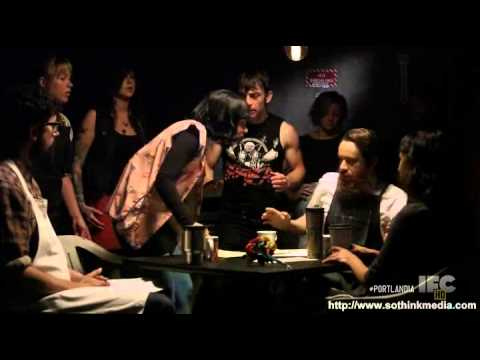

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/Person/myRepos/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Start here 

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [5]:
shops.star_rating.dtype

dtype('O')

In [6]:
shops.star_rating.value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [7]:
df = shops
good_shops = pd.DataFrame(df[(df.star_rating == ' 5.0 star rating ') | 
                (df.star_rating == ' 4.0 star rating ')])
bad_shops = df[(df.star_rating == ' 1.0 star rating ') |
              (df.star_rating == ' 2.0 star rating ')] # or df.star_rating == ' 2.0 star rating ']

print(good_shops.star_rating.value_counts())
bad_shops.star_rating.value_counts()
good_shops.shape

 5.0 star rating     3780
 4.0 star rating     2360
Name: star_rating, dtype: int64


(6140, 3)

In [8]:
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_md")

In [9]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [10]:
good_shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating


In [11]:
good_shops['tokens'] = good_shops['full_review_text'].apply(tokenize)

In [12]:
good_shops.head(3)

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11252016, 1, checkin, love, love, loved, the,..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[1222016, listed, in, date, night, austin, amb..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11302016, 1, checkin, listed, in, brunch, spo..."


In [13]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
good_shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 26616),
 ('and', 21311),
 ('a', 17706),
 ('i', 14952),
 ('to', 12763),
 ('of', 9932),
 ('is', 9644),
 ('coffee', 8234),
 ('in', 7517),
 ('it', 6898)]

In [14]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [15]:
wc = count(good_shops['tokens'])
wc.head(3)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
0,the,5479,26616,1.0,0.044245,0.044245,0.892345
26,and,5545,21311,2.0,0.035426,0.079670,0.903094
5,a,4983,17706,3.0,0.029433,0.109104,0.811564


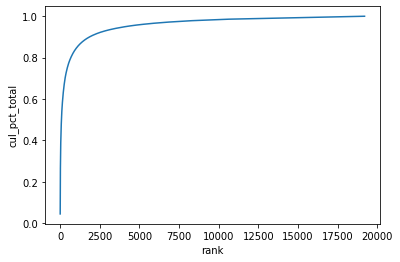

In [16]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [17]:
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.31047798579042035

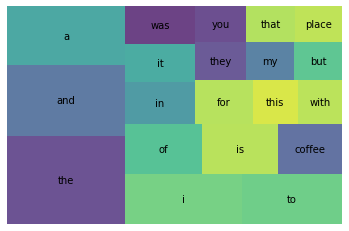

In [18]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [19]:
import spacy
from spacy.tokenizer import Tokenizer

#nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [20]:
STOP_WORDS = nlp.Defaults.stop_words.union(['batteries','I', 'amazon', 'i', 'Amazon', 'it', "it's", 'it.', 'the', 'this', ' '])

In [21]:
# Tokenizer Pipe

tokens_good = []
tokens_bad = []

""" Make them tokens """
for doc in tokenizer.pipe(good_shops['full_review_text'], batch_size=500):
    doc_tokens = []
    for token in doc:
        if (token.text.lower() not in STOP_WORDS):
            doc_tokens.append(token.text.lower())
    tokens_good.append(doc_tokens)
    
for doc in tokenizer.pipe(bad_shops['full_review_text'], batch_size=500):
    doc_tokens = []
    for token in doc:
        # .text.lower() is needed of STOP_WORDS to function
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
    tokens_bad.append(doc_tokens)

good_shops['tokens'] = tokens_good
bad_shops['tokens'] = tokens_bad

/Users/Person/anaconda3/envs/NLP/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
assert len(tokens_good) == len(good_shops)
assert len(tokens_bad) == len(bad_shops)

In [23]:
wc_good = count(good_shops['tokens'])
wc_bad = count(bad_shops['tokens'])
print(wc_good.head())
wc_bad.head()

       word  appears_in  count  rank  pct_total  cul_pct_total  appears_in_pct
2    coffee        3383   6421   1.0   0.020655       0.020655        0.550977
140   place        2432   3389   2.0   0.010902       0.031557        0.396091
153   great        2174   2902   3.0   0.009335       0.040893        0.354072
284    good        1643   2180   4.0   0.007013       0.047905        0.267590
211    like        1486   2068   5.0   0.006652       0.054558        0.242020


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7,coffee,390,749,1.0,0.016920,0.016920,0.528455
6,like,278,442,2.0,0.009985,0.026905,0.376694
86,place,291,438,3.0,0.009895,0.036799,0.394309
31,good,197,244,4.0,0.005512,0.042311,0.266938
267,i'm,148,210,5.0,0.004744,0.047055,0.200542


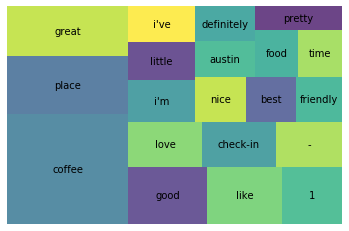

In [24]:
wc_good_top20 = wc_good[wc_good['rank'] <= 20]
wc_bad_top20 = wc_bad[wc_bad['rank'] <= 20]


squarify.plot(sizes=wc_good_top20['pct_total'], label=wc_good_top20['word'], alpha=.8)

plt.axis('off')
plt.show();

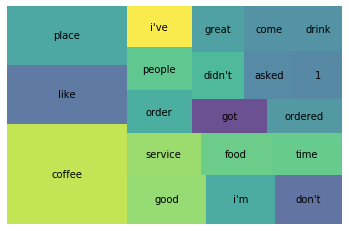

In [25]:
squarify.plot(sizes=wc_bad_top20['pct_total'], label=wc_bad_top20['word'], alpha=.8 )

plt.axis('off')
plt.show();

/Users/Person/anaconda3/envs/NLP/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


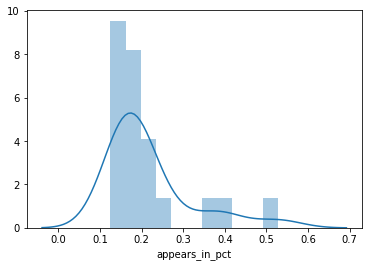

In [26]:
# visualize the distribution of frequencies of common words 
sns.distplot(wc_bad_top20['appears_in_pct']);

## Can you visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [27]:
wc_good.head()
# use pct_total feature to answer above question

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
2,coffee,3383,6421,1.0,0.020655,0.020655,0.550977
140,place,2432,3389,2.0,0.010902,0.031557,0.396091
153,great,2174,2902,3.0,0.009335,0.040893,0.354072
284,good,1643,2180,4.0,0.007013,0.047905,0.267590
211,like,1486,2068,5.0,0.006652,0.054558,0.242020


In [55]:
df2 = pd.merge(wc_good, wc_bad, on = 'word')
print(df2.shape, wc_good.shape, wc_bad.shape)
df2.head()

(7168, 13) (34371, 7) (10597, 7)


,word,appears_in_x,count_x,rank_x,pct_total_x,cul_pct_total_x,appears_in_pct_x,appears_in_y,count_y,rank_y,pct_total_y,cul_pct_total_y,appears_in_pct_y
0,coffee,3383,6421,1.0,0.020655,0.020655,0.550977,390,749,1.0,0.016920,0.016920,0.528455
1,place,2432,3389,2.0,0.010902,0.031557,0.396091,291,438,3.0,0.009895,0.036799,0.394309
2,great,2174,2902,3.0,0.009335,0.040893,0.354072,117,150,16.0,0.003389,0.090316,0.158537
3,good,1643,2180,4.0,0.007013,0.047905,0.267590,197,244,4.0,0.005512,0.042311,0.266938
4,like,1486,2068,5.0,0.006652,0.054558,0.242020,278,442,2.0,0.009985,0.026905,0.376694


In [73]:
df2['difference'] = (((df2['pct_total_x'] - df2['pct_total_y'])**2)**.5).round(4)
df2 = df2.sort_values(by='difference', ascending = False)
df2.head()

,word,appears_in_x,count_x,rank_x,pct_total_x,cul_pct_total_x,appears_in_pct_x,appears_in_y,count_y,rank_y,pct_total_y,cul_pct_total_y,appears_in_pct_y,difference
2,great,2174,2902,3.0,0.009335,0.040893,0.354072,117,150,16.0,0.003389,0.090316,0.158537,0.0059
0,coffee,3383,6421,1.0,0.020655,0.020655,0.550977,390,749,1.0,0.016920,0.016920,0.528455,0.0037
6,love,1263,1604,7.0,0.005160,0.065022,0.205700,58,71,64.0,0.001604,0.191678,0.078591,0.0036
4,like,1486,2068,5.0,0.006652,0.054558,0.242020,278,442,2.0,0.009985,0.026905,0.376694,0.0033
381,asked,116,122,385.0,0.000392,0.451868,0.018893,108,148,17.0,0.003343,0.093659,0.146341,0.0030


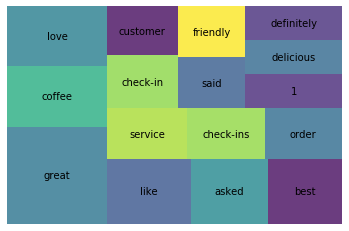

In [74]:
# plot top 5-10 distinguishing words 
top20_distinguishing_words = df2[df2['difference'] >= .002]

squarify.plot(sizes=top20_distinguishing_words['difference'],
              label=top20_distinguishing_words['word'], 
              alpha=.8 )

plt.axis('off')
plt.show();

In [75]:
distinguishing_words = df2['word'].iloc[0:5]
differences = df2['difference'].iloc[0:5]

# make a function to return most distinguishing words 
def responder(list1, list2):
    nominal_list = ['', '2nd ', '3rd ', '4th ', '5th ']
    for i in range(len(list1)):
        print("""The {}most distinguishing word is {}, with a difference of {} 
        between the good and bad coffee shops.""".format(
            nominal_list[i], list1[i], list2[i]))

# get the results
responder(distinguishing_words, differences)     

The most distinguishing word is coffee, with a difference of 0.0037 
        between the good and bad coffee shops.


KeyError: 1

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

